# Prophet
- [Prophet 공식문서](https://facebook.github.io/prophet/docs/quick_start.html#python-api)
- 어떤 순서로 진행되는지, 어떤 함수, 어떤 라이브러리가 사용되는지 이런걸 잘 기억하는게 중요(나머지는 잘 찾아서 사용할줄 아는게 중요!) > 일련의 과정들을 잘 기억하기! 다 큰 틀 안에서 세부적인 것만 좀 바뀌는거임!

In [1]:
# 코랩
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 825.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536952 sha256=4b85d4405bf70c1cb58702cf28693b10db4ae7f08317969e0b0bf3b2bc986e8e
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdst

In [2]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [3]:
df = pd.read_csv('/content/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [6]:
# step1 - ds, y로 컬럼명 변경하기
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [7]:
# step2 - 날짜 정보를 가지는 컬럼을 datetime 자료형으로 변경
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


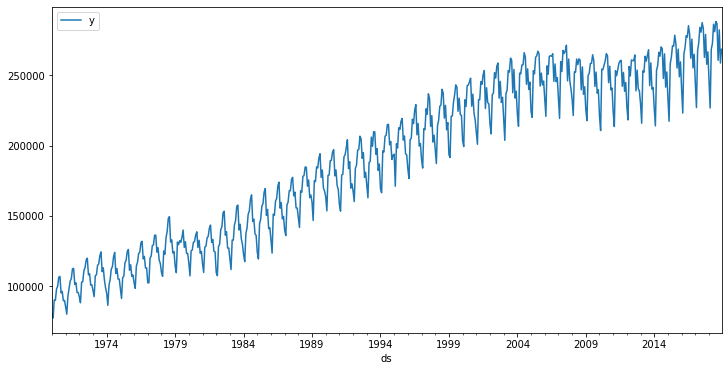

In [9]:
df.plot(x = 'ds', y = 'y', figsize=(12,6)) # df['y'].plot(figsize=(12,6)) >> 이건 x축이 날짜로 안됨

In [10]:
len(df)

588

- 머신러닝: train과 test를 나눈다!
- 문제를 다 주지 않고, 모델이 얼마나 잘 학습했나 test용을 남겨두는 것!
- 이 개념 잘 기억하고 있기!
- 연단위로 보겠다! season.. 12배수로 보는게 좋을 듯!


In [11]:
len(df) - 12

576

In [12]:
# train, test data 분리
train = df.iloc[:576]
test = df.iloc[576:]

In [16]:
train

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0
...,...,...
571,2017-08-01,283184.0
572,2017-09-01,262673.0
573,2017-10-01,278937.0
574,2017-11-01,257712.0


In [18]:
test

,ds,y
576,2018-01-01,245695.0
577,2018-02-01,226660.0
578,2018-03-01,268480.0
579,2018-04-01,272475.0
580,2018-05-01,286164.0
581,2018-06-01,280877.0
582,2018-07-01,288145.0
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0


In [13]:
# step3 - 모델 학습
m = Prophet() # 모델이라는 공간 만들고
m.fit(train) # 데이터 넣어줘서 모델 학습!

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# step4 - 예측 후 데이터가 들어갈 dataframe을 생성(make future dataframe)
future = m.make_future_dataframe(periods = 12, freq='MS') # 12개 테스트 할거니까 peroids=12
future # 12개의 빈칸이 만들어짐

,ds
0,1970-01-01
1,1970-02-01
2,1970-03-01
3,1970-04-01
4,1970-05-01
...,...
583,2018-08-01
584,2018-09-01
585,2018-10-01
586,2018-11-01


In [19]:
# step5 - 예측
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12) # yhat_lower,upper >> 내가 예측한 결과로는 yhat이 낮아봤자 이정도, 높아봤자 이정도 일거야

,ds,yhat,yhat_lower,yhat_upper
576,2018-01-01,243959.082641,238127.072992,249876.731204
577,2018-02-01,235591.209755,229749.079085,241336.573198
578,2018-03-01,262795.010465,256869.322493,268184.275094
579,2018-04-01,263000.536347,257223.160132,268658.612576
580,2018-05-01,272726.633544,266865.847482,278651.427478
581,2018-06-01,272982.013199,267589.778007,278457.190349
582,2018-07-01,279443.147798,273690.468271,284712.991233
583,2018-08-01,279982.270949,274034.542335,285229.221658
584,2018-09-01,262008.088487,255843.133600,268010.945034
585,2018-10-01,269123.030010,263380.875402,274629.341585


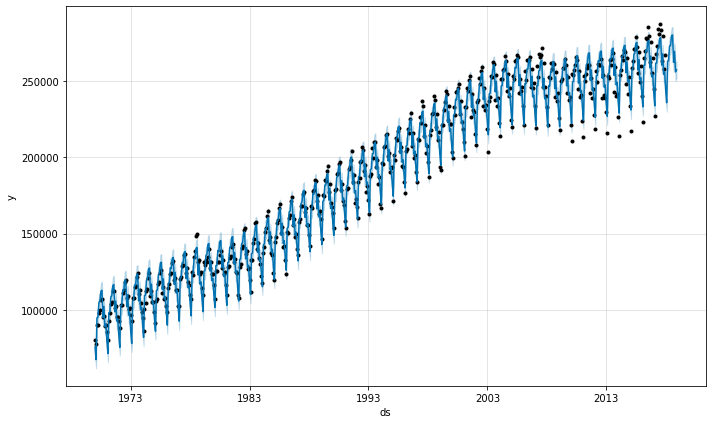

In [20]:
# step6 - 시각화
m.plot(forecast); # 이럴땐 세미콜론(;) 해줘야 잘된다고 함 > 안그러면 여러개 그려짐

In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94273.379296,70035.467956,81543.700813,94273.379296,94273.379296,-18590.389357,-18590.389357,-18590.389357,-18590.389357,-18590.389357,-18590.389357,0.0,0.0,0.0,75682.989939
1,1970-02-01,94582.709770,61644.211071,73275.113072,94582.709770,94582.709770,-27102.394737,-27102.394737,-27102.394737,-27102.394737,-27102.394737,-27102.394737,0.0,0.0,0.0,67480.315033
2,1970-03-01,94862.105037,88838.497886,100764.449028,94862.105037,94862.105037,-28.778216,-28.778216,-28.778216,-28.778216,-28.778216,-28.778216,0.0,0.0,0.0,94833.326822
3,1970-04-01,95171.435512,89443.147597,101016.078182,95171.435512,95171.435512,32.615171,32.615171,32.615171,32.615171,32.615171,32.615171,0.0,0.0,0.0,95204.050683
4,1970-05-01,95470.787584,99477.873828,110520.343423,95470.787584,95470.787584,9619.229308,9619.229308,9619.229308,9619.229308,9619.229308,9619.229308,0.0,0.0,0.0,105090.016893


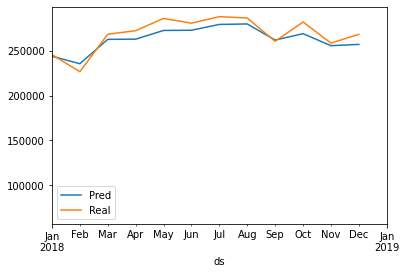

In [23]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred') # 예측한 결과는 이렇게 그려줌
test.plot(x = 'ds', y = 'y', label = 'Real', ax=ax, xlim=['2018-01-01', '2019-01-01']) # test결과를 이렇게 그려줌! > 모델이 주어진 데이터로 학습했을 때 예측한 값은 실제값과 이정도 차이가 났다. 알 수 있다,

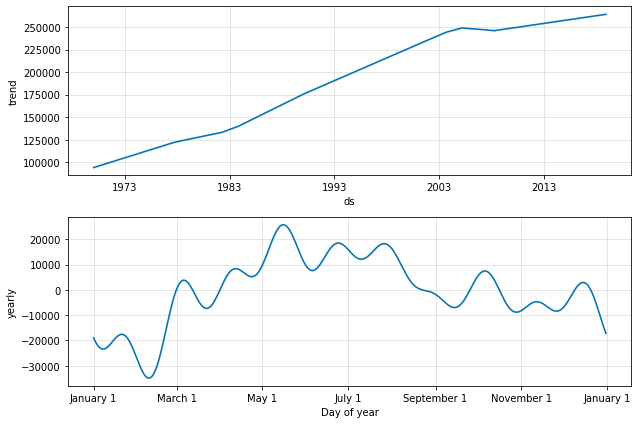

In [24]:
m.plot_components(forecast); # trend, seasonality주기성(1년에) > 값이 어떻게 변하는지 보기!(2월에 낮고, 5,6,7,8에 높은 값,, 11월 이후 낮음.. 여행객수라서 그럴듯)

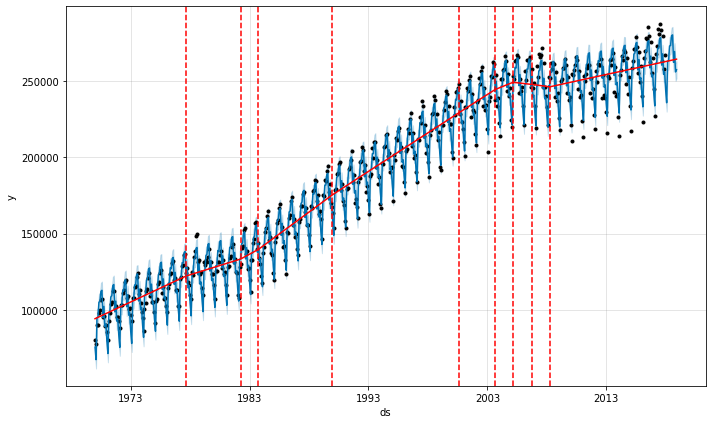

In [26]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) # 모델이 예측한 선과 trend가 바뀌는 point들을 볼 수 있음! / fig.gca() > 위에 fig 축을 추가해준거임?

## Mul Model
- default 모델이 더 잘 작동하는지, multicative 모델이 더 작동하는지 보기

In [36]:
# fit model
mul_model = Prophet(seasonality_mode='multiplicative')
mul_model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
# make future dataframe
future = mul_model.make_future_dataframe(periods = 12, freq='MS')
future 

,ds
0,1970-01-01
1,1970-02-01
2,1970-03-01
3,1970-04-01
4,1970-05-01
...,...
583,2018-08-01
584,2018-09-01
585,2018-10-01
586,2018-11-01


In [38]:
# forecast, predict
mul_forecast = mul_model.predict(future)
mul_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
576,2018-01-01,237369.089727,232247.742391,243119.286886
577,2018-02-01,225600.089186,219970.183013,230545.019696
578,2018-03-01,263694.742122,258110.430979,269149.393101
579,2018-04-01,263635.287652,258387.030195,269297.300035
580,2018-05-01,276507.432794,271215.867117,282106.464977
581,2018-06-01,276435.680803,270364.465303,281980.385958
582,2018-07-01,284486.413771,278986.074633,289745.476881
583,2018-08-01,284724.028177,279529.068238,289823.353345
584,2018-09-01,260501.581368,254615.229350,266015.615291
585,2018-10-01,271366.657804,265900.115553,276138.462178


In [39]:
mul_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1970-01-01,93884.113779,79558.483862,90224.488675,93884.113779,93884.113779,-0.095404,-0.095404,-0.095404,-0.095404,-0.095404,-0.095404,0.0,0.0,0.0,84927.181882
1,1970-02-01,94198.249553,75740.453998,86199.865516,94198.249553,94198.249553,-0.140727,-0.140727,-0.140727,-0.140727,-0.140727,-0.140727,0.0,0.0,0.0,80941.968628
2,1970-03-01,94481.985092,90168.066241,100272.977896,94481.985092,94481.985092,0.003870,0.003870,0.003870,0.003870,0.003870,0.003870,0.0,0.0,0.0,94847.652947
3,1970-04-01,94796.120867,89658.434004,100491.074957,94796.120867,94796.120867,0.003093,0.003093,0.003093,0.003093,0.003093,0.003093,0.0,0.0,0.0,95089.308720
4,1970-05-01,95100.123229,94665.482327,105156.902578,95100.123229,95100.123229,0.051511,0.051511,0.051511,0.051511,0.051511,0.051511,0.0,0.0,0.0,99998.795245


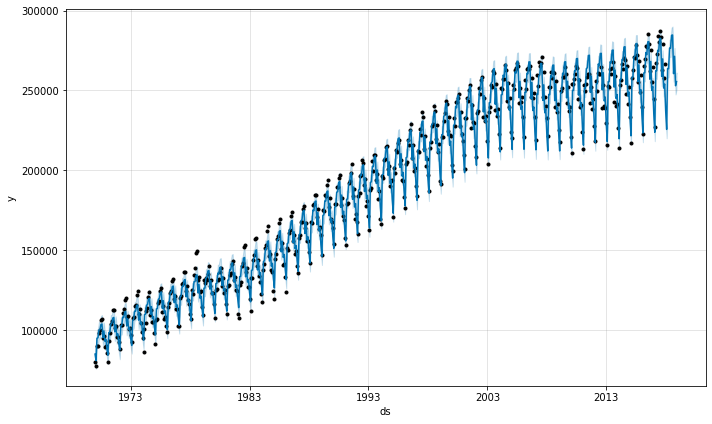

In [40]:
# visualize
mul_model.plot(forecast);

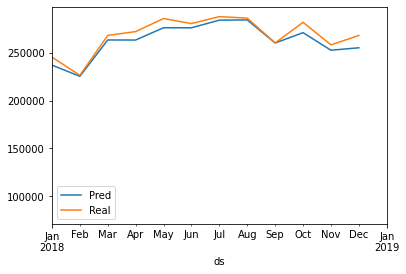

In [41]:
ax = mul_forecast.plot(x = 'ds', y = 'yhat', label = 'Pred') 
test.plot(x = 'ds', y = 'y', label = 'Real', ax=ax, xlim=['2018-01-01', '2019-01-01'])

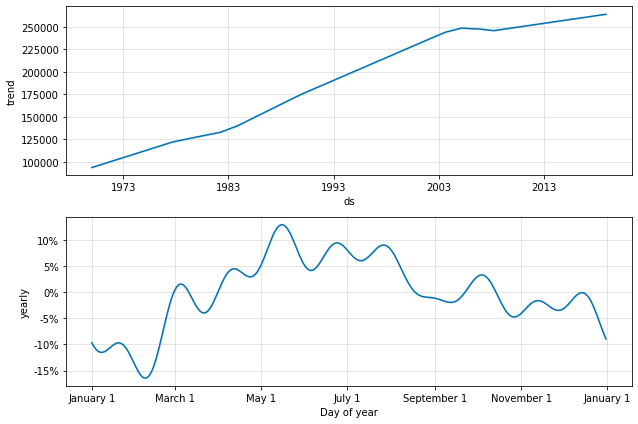

In [42]:
mul_model.plot_components(forecast);

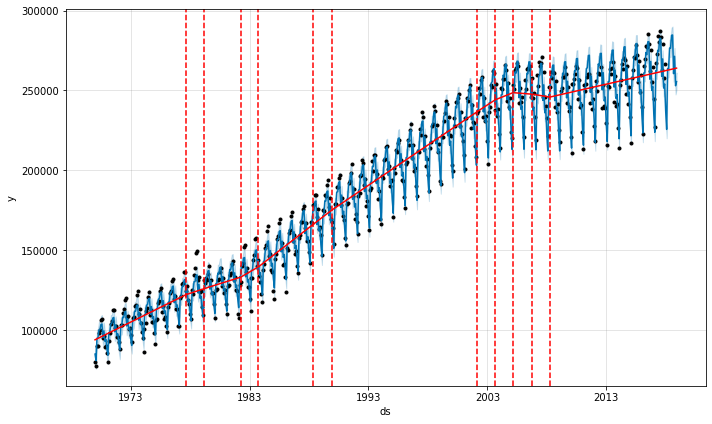

In [43]:
from fbprophet.plot import add_changepoints_to_plot
fig = mul_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), mul_model, mul_forecast)

- mul_model이 좀 더 잘 예측한듯.. trend points가 더 많음..?? 이게 좋은거임?
- m이랑 mul_model 비교할 그래프 만들어보기!

## 평가
- RMSE(root mean squared error)가 크다 > 오차가 크다 > 많이 틀렸다

In [44]:
from statsmodels.tools.eval_measures import rmse

In [45]:
forecast # 예측한거에서 train, test데이터.. 나눠서.. 개수, 시기 맞게 비교해야 됨. > 비교할 시기에 맞는 데이터 뽑아주기..?

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1970-01-01,93884.113779,79260.693137,90288.559435,93884.113779,93884.113779,-0.095404,-0.095404,-0.095404,-0.095404,-0.095404,-0.095404,0.0,0.0,0.0,84927.181882
1,1970-02-01,94198.249553,75796.449878,86486.500984,94198.249553,94198.249553,-0.140727,-0.140727,-0.140727,-0.140727,-0.140727,-0.140727,0.0,0.0,0.0,80941.968628
2,1970-03-01,94481.985092,89717.813886,100202.776003,94481.985092,94481.985092,0.003870,0.003870,0.003870,0.003870,0.003870,0.003870,0.0,0.0,0.0,94847.652947
3,1970-04-01,94796.120867,89492.400396,100722.280711,94796.120867,94796.120867,0.003093,0.003093,0.003093,0.003093,0.003093,0.003093,0.0,0.0,0.0,95089.308720
4,1970-05-01,95100.123229,94480.123590,105179.663589,95100.123229,95100.123229,0.051511,0.051511,0.051511,0.051511,0.051511,0.051511,0.0,0.0,0.0,99998.795245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,263390.348405,279419.390594,290026.966785,263352.703903,263435.183826,0.080996,0.080996,0.080996,0.080996,0.080996,0.080996,0.0,0.0,0.0,284724.028177
584,2018-09-01,263534.657122,255484.969662,266289.952073,263476.056805,263611.146345,-0.011509,-0.011509,-0.011509,-0.011509,-0.011509,-0.011509,0.0,0.0,0.0,260501.581368
585,2018-10-01,263674.310719,265741.462674,276585.994102,263590.847769,263789.527736,0.029174,0.029174,0.029174,0.029174,0.029174,0.029174,0.0,0.0,0.0,271366.657804
586,2018-11-01,263818.619436,247464.448164,258577.031054,263694.821000,263976.118764,-0.041243,-0.041243,-0.041243,-0.041243,-0.041243,-0.041243,0.0,0.0,0.0,252938.050154


In [46]:
predictions = forecast.iloc[-12:]['yhat']
len(predictions)

12

In [47]:
rmse(predictions, test['y']) # (모델이 예측한 값, 실제값(정답)) / rmse는 클수록 좋지 않음 > 클수록 많이 틀린거임(절대적으로 얼마 이상 얼마 이후가 좋다 나쁘다, 이게 아니라 다른 모델이랑 비교해서 성능 뭐가 더 좋은지.. rmse를 얼마나 줄여나가야 하는지..)

7166.905842658019

- rmse를 써도 되는데 왜 prophet evaluate를 쓰는지
- 얘는 계속 이동하면서 비교. rmse는 마지막 12개만 비교! cross validation 여러개를 한번에 cross해서 비교한다.. (rmse는 그냥 validation)
- rmse로 평가하는 방법이 있고, prophet evaluate(cross validation)로 평가하는 방법이 있는거임

## Cross validation

In [48]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [49]:
df_cv = cross_validation(mul_model, initial = f'{5 * 365} days', period = f'{5 * 365} days', horizon = f'{365} days') 
# 위에 있는 cross_validation 객체를 가져오고, mul_model을 넣어줌 / 만약 1년을 넣어주면 '365 days'넣어주면 됨. 우리는 5년 데이터! 
# 5년을 학습하겠다(initial), 5년 이동해서(period), horizon(1년 예측해보겠다) >>> 5년학습, 1년예측, 5년학습, 1년예측 >> 이걸 반복!!!
# 9 번 교차검증할 수 있는거임(오백몇개있었는데 5년씩이니까 60 나눠주면 그정도임)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [50]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,106264.483030,104884.718718,107620.489132,102445.0,1976-12-11
1,1977-02-01,99635.332014,98220.266850,100963.553989,102416.0,1976-12-11
2,1977-03-01,118429.887993,116972.309302,119769.633490,119960.0,1976-12-11
3,1977-04-01,120350.669111,118970.268108,121747.091180,121513.0,1976-12-11
4,1977-05-01,128575.446185,127118.291876,129878.234642,128884.0,1976-12-11
...,...,...,...,...,...,...
103,2017-08-01,277848.097912,272198.229948,283527.946204,283184.0,2016-12-01
104,2017-09-01,254201.733051,248770.940982,259460.041119,262673.0,2016-12-01
105,2017-10-01,264723.822632,259477.699931,269956.837133,278937.0,2016-12-01
106,2017-11-01,246864.033686,241377.578478,252112.914702,257712.0,2016-12-01


In [51]:
performance_metrics(df_cv) # 다 클수록 안좋음

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.690901e+07,5187.389039,3950.179371,0.023504,0.018424,0.5
1,53 days,2.553343e+07,5053.061789,3659.485362,0.020624,0.014656,0.6
2,54 days,2.661229e+07,5158.709893,3777.702341,0.020795,0.014656,0.6
3,55 days,2.644619e+07,5142.586351,3731.767863,0.020324,0.013922,0.6
4,57 days,3.171054e+07,5631.210971,4353.978764,0.023648,0.018424,0.5
...,...,...,...,...,...,...,...
94,360 days,1.873966e+07,4328.932539,3070.471308,0.016343,0.011142,0.6
95,361 days,2.013264e+07,4486.941579,3414.307921,0.017790,0.014778,0.6
96,362 days,2.858340e+07,5346.344249,4268.582565,0.021333,0.018822,0.5
97,364 days,2.871006e+07,5358.176861,4296.356717,0.021476,0.018822,0.5


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


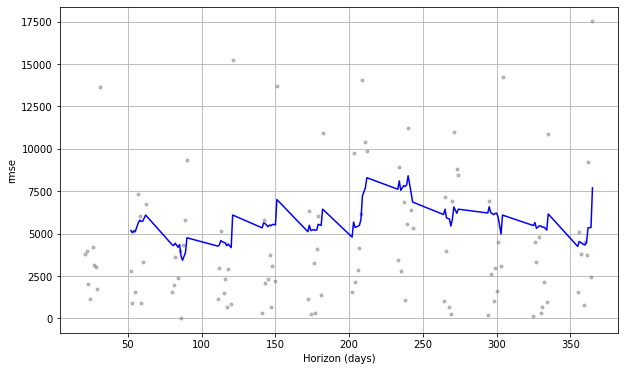

In [53]:
plot_cross_validation_metric(df_cv, metric = 'rmse'); # rmse기준으로 그려주겠다 / 1년에 어떤 시점에서 예측을 잘 못하는지(80일쯤 예측잘하고, 240일 정도 지날쯤엔 잘 못함 >> 시점에 대한 noise가 있을 수 있음.. 이런거 확인하고, 고쳐가며 모델 성능을 높여가는게 우리가 할 일)